In [180]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

# 数据加载
data = pd.read_csv('heart2.csv')

print("\n数据类型：")
print(data.dtypes)

# 1. 去除缺失值
# 如果数据中有 NA 值，直接删除
data = data.dropna()

# 2. 热独编码
# 将分类变量 'Sex' 转换为两个独立列 'Male' 和 'Female'
# 对其他分类变量（如 ChestPainType, RestingECG, ExerciseAngina, ST_Slope）进行热独编码
categorical_cols = ['Sex','ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']
data = pd.get_dummies(data, columns=categorical_cols)

# 3. 打印处理后数据的前几行和数据类型
print("数据的前几行：")
print(data.head())
# 打印数据总量和特征数量
print("\n数据总量（行数）：", data.shape[0])
print("特征数量（列数）：", data.shape[1])


# 4. 提取特征和标签
# 将 'HeartDisease' 作为标签，其余列为特征
X = data.drop(columns=['HeartDisease']).values
y = data['HeartDisease'].values

# 5. 数据标准化
# 标准化的目的：将所有特征的值调整为均值为 0，方差为 1 的标准正态分布，便于模型训练时权重的稳定更新。
scaler = StandardScaler()
X = scaler.fit_transform(X)

# 打印标准化后的一些特征
print("\n标准化后的数据（前5行）：")
print(X[:5])

# 6. 数据集分割
# 按 80% 训练集和 20% 测试集分割
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 7. 转换为 PyTorch 的 tensor 格式
import torch
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)

# from torch.utils.data import DataLoader, TensorDataset

# # 定义 batch_size
# batch_size = 32  # 可以根据需要调整

# # 创建 TensorDataset
# train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
# test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

# # 创建 DataLoader
# train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
# test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# #sigmoid
# # 转换为 PyTorch 的 tensor 格式，并调整形状
# X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
# y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)  # 调整为 [样本数, 1]
# X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
# y_test_tensor = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)    # 调整为 [样本数, 1]


# 打印 tensor 的形状以检查
print("\n训练集特征张量形状：", X_train_tensor.shape)
print("训练集标签张量形状：", y_train_tensor.shape)
print("测试集特征张量形状：", X_test_tensor.shape)
print("测试集标签张量形状：", y_test_tensor.shape)



数据类型：
Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object
数据的前几行：
   Age  RestingBP  Cholesterol  FastingBS  MaxHR  Oldpeak  HeartDisease  \
0   40        140          289          0    172      0.0             0   
1   49        160          180          0    156      1.0             1   
2   37        130          283          0     98      0.0             0   
3   48        138          214          0    108      1.5             1   
4   54        150          195          0    122      0.0             0   

   Sex_F  Sex_M  ChestPainType_ASY  ...  ChestPainType_NAP  ChestPainType_TA  \
0  False   True              False  ...              False             False   
1   True  False              False  ...         

In [181]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# 定义神经网络
class HeartDiseaseANN(nn.Module):
    def __init__(self, input_size, hidden_layers, dropout_rate):
        super(HeartDiseaseANN, self).__init__()
        self.layers = nn.ModuleList()
        self.dropout_rate = dropout_rate

        # 构建网络层
        self.layers.append(nn.Linear(input_size, hidden_layers[0]))
        self.layers.append(nn.ReLU())
        self.layers.append(nn.Dropout(p=dropout_rate))  # 第一个隐藏层的 Dropout

        for i in range(1, len(hidden_layers)):
            self.layers.append(nn.Linear(hidden_layers[i - 1], hidden_layers[i]))
            self.layers.append(nn.ReLU())
            self.layers.append(nn.Dropout(p=dropout_rate))  # 中间层的 Dropout

        self.layers.append(nn.Linear(hidden_layers[-1], 2))  # 输出层
        # self.layers.append(nn.Linear(hidden_layers[-1], 1))  # 输出层
        self.softmax = nn.Softmax(dim=1)
        # self.sigmoid = nn.Sigmoid()
        
    def forward(self, x):
        for layer in self.layers:
            x = layer(x)
        x = self.softmax(x)
        # x = self.sigmoid(x)
        return x




Epoch 1/100, Training Loss: 0.6912, Training Accuracy: 0.5477, Validation Loss: 0.5325, Validation Accuracy: 0.8478
Epoch 2/100, Training Loss: 0.5233, Training Accuracy: 0.8610, Validation Loss: 0.4711, Validation Accuracy: 0.8587
Epoch 3/100, Training Loss: 0.4615, Training Accuracy: 0.8638, Validation Loss: 0.4551, Validation Accuracy: 0.8587
Epoch 4/100, Training Loss: 0.4444, Training Accuracy: 0.8760, Validation Loss: 0.4486, Validation Accuracy: 0.8641
Epoch 5/100, Training Loss: 0.4386, Training Accuracy: 0.8719, Validation Loss: 0.4446, Validation Accuracy: 0.8641
Epoch 6/100, Training Loss: 0.4338, Training Accuracy: 0.8801, Validation Loss: 0.4402, Validation Accuracy: 0.8750
Epoch 7/100, Training Loss: 0.4312, Training Accuracy: 0.8787, Validation Loss: 0.4370, Validation Accuracy: 0.8859
Epoch 8/100, Training Loss: 0.4274, Training Accuracy: 0.8924, Validation Loss: 0.4364, Validation Accuracy: 0.8859
Epoch 9/100, Training Loss: 0.4270, Training Accuracy: 0.8896, Validatio

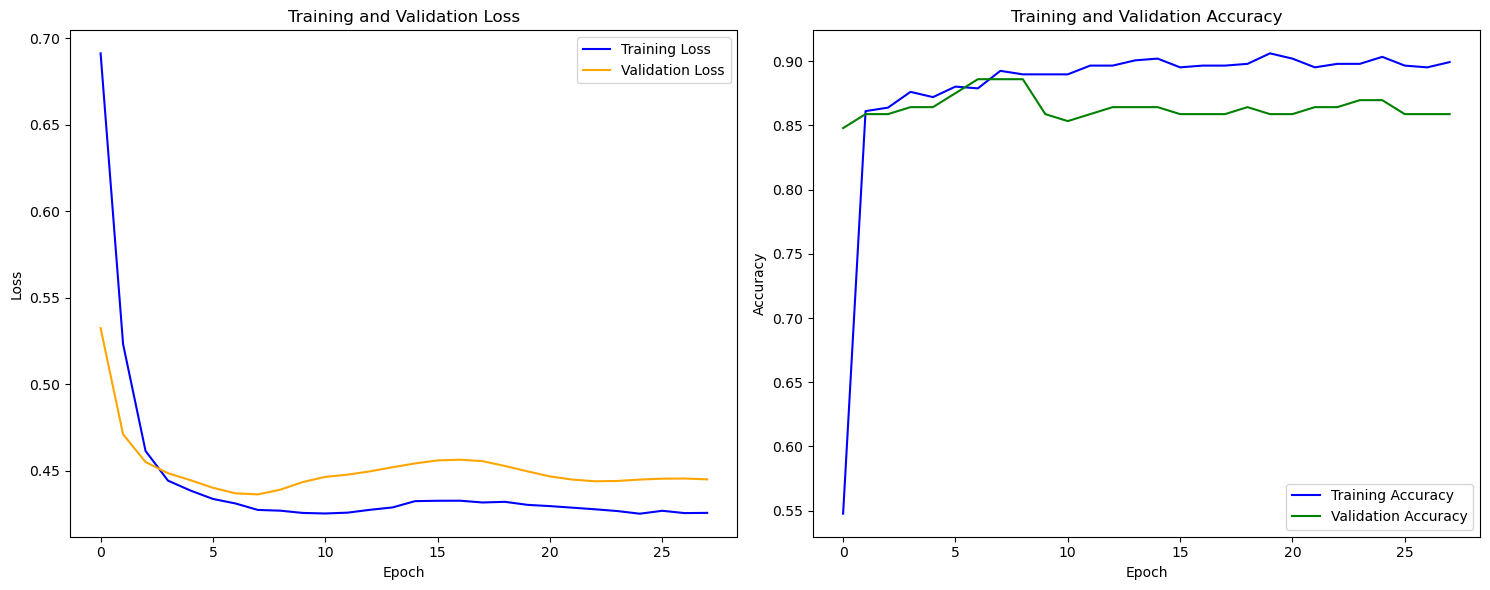

In [182]:
import matplotlib.pyplot as plt

# 定义超参数
input_size = X_train_tensor.shape[1]  # 输入特征数
hidden_layers = [256,128] # 隐藏层神经元数量
dropout_rate = 0.1  # Dropout 的丢弃率
learning_rate = 0.01  # 学习率
alpha = 0.01  # L2 正则化
num_epochs = 100  # 最大迭代次数
early_stop_patience = 20  # 早停的容忍次数

# 模型实例化
model = HeartDiseaseANN(input_size, hidden_layers, dropout_rate)
criterion = nn.CrossEntropyLoss()
# criterion = nn.BCEWithLogitsLoss()  # 二分类任务的损失函数

optimizer = optim.Adam(model.parameters(), lr=learning_rate, weight_decay=alpha)

# 早停实现
best_val_loss = float('inf')
patience_counter = 0

# 记录训练和验证的损失与准确率
train_losses = []
train_accuracies = []
val_losses = []
val_accuracies = []

# 训练循环
for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()

    # 前向传播
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)
    loss.backward()
    optimizer.step()

    train_losses.append(loss.item())  # 记录训练集损失

    # 计算训练集准确率
    _, train_preds = torch.max(outputs, 1)
    train_acc = (train_preds == y_train_tensor).sum().item() / y_train_tensor.size(0)
    train_accuracies.append(train_acc)

    # 验证阶段
    model.eval()
    with torch.no_grad():
        val_outputs = model(X_test_tensor)
        val_loss = criterion(val_outputs, y_test_tensor)
        val_losses.append(val_loss.item())  # 记录验证集损失

        # 计算验证集准确率
        _, val_preds = torch.max(val_outputs, 1)
        val_acc = (val_preds == y_test_tensor).sum().item() / y_test_tensor.size(0)
        val_accuracies.append(val_acc)

    print(f"Epoch {epoch+1}/{num_epochs}, "
          f"Training Loss: {loss.item():.4f}, "
          f"Training Accuracy: {train_acc:.4f}, "
          f"Validation Loss: {val_loss.item():.4f}, "
          f"Validation Accuracy: {val_acc:.4f}")

    # 早停逻辑
    if val_loss.item() < best_val_loss:
        best_val_loss = val_loss.item()
        patience_counter = 0  # 重置计数器
    else:
        patience_counter += 1
        if patience_counter >= early_stop_patience:
            print(f"Early stop trigger! Stop training at {epoch+1}.")
            break

# 可视化训练和验证过程
plt.figure(figsize=(15, 6))

# 绘制训练和验证损失
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Training Loss', color='blue')
plt.plot(val_losses, label='Validation Loss', color='orange')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

# 绘制训练和验证准确率
plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label='Training Accuracy', color='blue')
plt.plot(val_accuracies, label='Validation Accuracy', color='green')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.tight_layout()
plt.show()



数据类型：
Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object
数据的前几行：
   Age  RestingBP  Cholesterol  FastingBS  MaxHR  Oldpeak  HeartDisease  \
0   40        140          289          0    172      0.0             0   
1   49        160          180          0    156      1.0             1   
2   37        130          283          0     98      0.0             0   
3   48        138          214          0    108      1.5             1   
4   54        150          195          0    122      0.0             0   

   Sex_F  Sex_M  ChestPainType_ASY  ...  ChestPainType_NAP  ChestPainType_TA  \
0  False   True              False  ...              False             False   
1   True  False              False  ...         

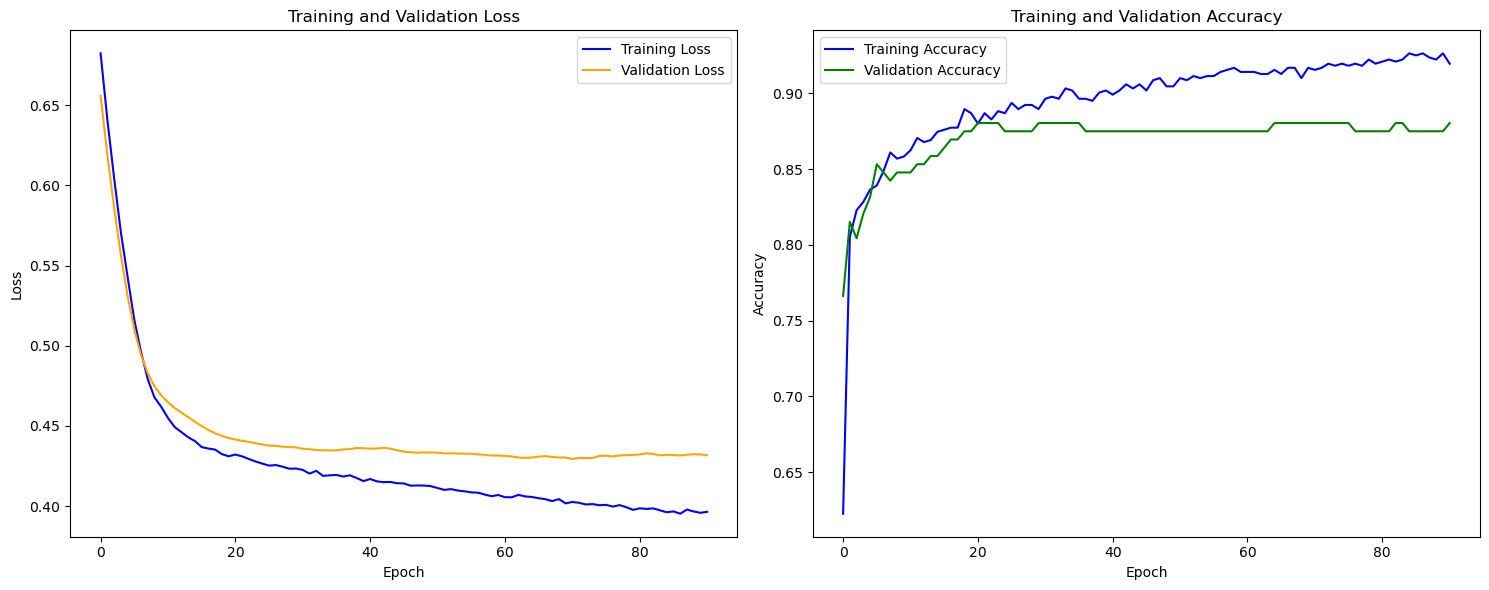

In [149]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import matplotlib.pyplot as plt

# 数据加载
data = pd.read_csv('heart2.csv')

print("\n数据类型：")
print(data.dtypes)

# 1. 去除缺失值
data = data.dropna()

# 2. 热独编码
categorical_cols = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']
data = pd.get_dummies(data, columns=categorical_cols)

# 3. 打印处理后数据的前几行和数据类型
print("数据的前几行：")
print(data.head())
print("\n数据总量（行数）：", data.shape[0])
print("特征数量（列数）：", data.shape[1])

# 4. 提取特征和标签
X = data.drop(columns=['HeartDisease']).values
y = data['HeartDisease'].values

# 5. 数据标准化
scaler = StandardScaler()
X = scaler.fit_transform(X)
print("\n标准化后的数据（前5行）：")
print(X[:5])

# 6. 数据集分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 7. 转换为 PyTorch 的 tensor 格式，并创建 DataLoader
batch_size = 256
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)

train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# 定义神经网络
class HeartDiseaseANN(nn.Module):
    def __init__(self, input_size, hidden_layers, dropout_rate):
        super(HeartDiseaseANN, self).__init__()
        self.layers = nn.ModuleList()

        # 构建网络层
        self.layers.append(nn.Linear(input_size, hidden_layers[0]))
        self.layers.append(nn.ReLU())
        self.layers.append(nn.Dropout(p=dropout_rate))  # 第一个隐藏层的 Dropout

        for i in range(1, len(hidden_layers)):
            self.layers.append(nn.Linear(hidden_layers[i - 1], hidden_layers[i]))
            self.layers.append(nn.ReLU())
            self.layers.append(nn.Dropout(p=dropout_rate))  # 中间层的 Dropout

        self.layers.append(nn.Linear(hidden_layers[-1], 2))  # 输出层
        self.softmax = nn.Softmax(dim=1)
        
    def forward(self, x):
        for layer in self.layers:
            x = layer(x)
        x = self.softmax(x)
        return x

# 定义超参数
input_size = X_train_tensor.shape[1]
hidden_layers = [128, 64]  # 隐藏层神经元数量
dropout_rate = 0.05  # Dropout 的丢弃率
learning_rate = 0.001  # 学习率
alpha = 0.001  # L2 正则化
num_epochs = 100  # 最大迭代次数
early_stop_patience = 20  # 早停的容忍次数

# 模型实例化
model = HeartDiseaseANN(input_size, hidden_layers, dropout_rate)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate, weight_decay=alpha)

# 早停实现
best_val_loss = float('inf')
patience_counter = 0

# 记录训练和验证的损失与准确率
train_losses = []
train_accuracies = []
val_losses = []
val_accuracies = []

# 训练循环
for epoch in range(num_epochs):
    model.train()
    train_loss = 0.0
    train_correct = 0

    # 逐批次训练
    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)
        loss.backward()
        optimizer.step()

        # 累加损失和正确预测数
        train_loss += loss.item() * X_batch.size(0)
        _, preds = torch.max(outputs, 1)
        train_correct += (preds == y_batch).sum().item()

    # 计算平均训练损失和准确率
    avg_train_loss = train_loss / len(train_loader.dataset)
    avg_train_acc = train_correct / len(train_loader.dataset)
    train_losses.append(avg_train_loss)
    train_accuracies.append(avg_train_acc)

    # 验证阶段
    model.eval()
    val_loss = 0.0
    val_correct = 0
    with torch.no_grad():
        for X_batch, y_batch in test_loader:
            outputs = model(X_batch)
            loss = criterion(outputs, y_batch)
            val_loss += loss.item() * X_batch.size(0)
            _, preds = torch.max(outputs, 1)
            val_correct += (preds == y_batch).sum().item()

    avg_val_loss = val_loss / len(test_loader.dataset)
    avg_val_acc = val_correct / len(test_loader.dataset)
    val_losses.append(avg_val_loss)
    val_accuracies.append(avg_val_acc)

    print(f"Epoch {epoch+1}/{num_epochs}, "
          f"Training Loss: {avg_train_loss:.4f}, Training Accuracy: {avg_train_acc:.4f}, "
          f"Validation Loss: {avg_val_loss:.4f}, Validation Accuracy: {avg_val_acc:.4f}")

    # 早停逻辑
    if avg_val_loss < best_val_loss:
        best_val_loss = avg_val_loss
        patience_counter = 0
    else:
        patience_counter += 1
        if patience_counter >= early_stop_patience:
            print(f"Early stop triggered! Stopping training at epoch {epoch+1}.")
            break

# 可视化训练和验证过程
plt.figure(figsize=(15, 6))

# 绘制训练和验证损失
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Training Loss', color='blue')
plt.plot(val_losses, label='Validation Loss', color='orange')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

# 绘制训练和验证准确率
plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label='Training Accuracy', color='blue')
plt.plot(val_accuracies, label='Validation Accuracy', color='green')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.tight_layout()
plt.show()



数据类型：
Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object
数据的前几行：
   Age  RestingBP  Cholesterol  FastingBS  MaxHR  Oldpeak  HeartDisease  \
0   40        140          289          0    172      0.0             0   
1   49        160          180          0    156      1.0             1   
2   37        130          283          0     98      0.0             0   
3   48        138          214          0    108      1.5             1   
4   54        150          195          0    122      0.0             0   

   Sex_F  Sex_M  ChestPainType_ASY  ...  ChestPainType_NAP  ChestPainType_TA  \
0  False   True              False  ...              False             False   
1   True  False              False  ...         

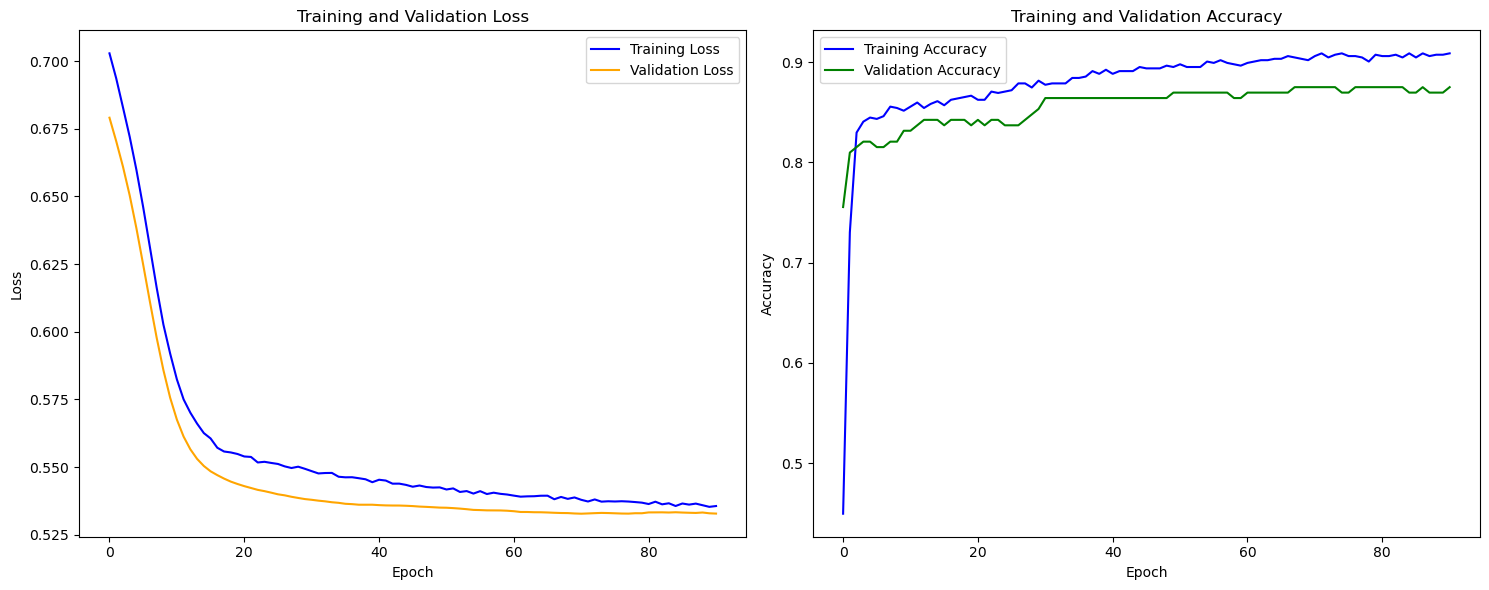

In [148]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import matplotlib.pyplot as plt

# 数据加载
data = pd.read_csv('heart2.csv')

print("\n数据类型：")
print(data.dtypes)

# 1. 去除缺失值
data = data.dropna()

# 2. 热独编码
categorical_cols = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']
data = pd.get_dummies(data, columns=categorical_cols)

# 3. 打印处理后数据的前几行和数据类型
print("数据的前几行：")
print(data.head())
print("\n数据总量（行数）：", data.shape[0])
print("特征数量（列数）：", data.shape[1])

# 4. 提取特征和标签
X = data.drop(columns=['HeartDisease']).values
y = data['HeartDisease'].values

# 5. 数据标准化
scaler = StandardScaler()
X = scaler.fit_transform(X)
print("\n标准化后的数据（前5行）：")
print(X[:5])

# 6. 数据集分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 7. 转换为 PyTorch 的 tensor 格式，并创建 DataLoader
batch_size = 256
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)  # 调整形状
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)    # 调整形状

train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# 定义神经网络
class HeartDiseaseANN(nn.Module):
    def __init__(self, input_size, hidden_layers, dropout_rate):
        super(HeartDiseaseANN, self).__init__()
        self.layers = nn.ModuleList()

        # 构建网络层
        self.layers.append(nn.Linear(input_size, hidden_layers[0]))
        self.layers.append(nn.ReLU())
        self.layers.append(nn.Dropout(p=dropout_rate))  # 第一个隐藏层的 Dropout

        for i in range(1, len(hidden_layers)):
            self.layers.append(nn.Linear(hidden_layers[i - 1], hidden_layers[i]))
            self.layers.append(nn.ReLU())
            self.layers.append(nn.Dropout(p=dropout_rate))  # 中间层的 Dropout

        self.layers.append(nn.Linear(hidden_layers[-1], 1))  # 输出层，用于二分类
        self.sigmoid = nn.Sigmoid()  # Sigmoid 激活函数
        
    def forward(self, x):
        for layer in self.layers:
            x = layer(x)
        x = self.sigmoid(x)  # 使用 Sigmoid 激活
        return x

# 定义超参数
input_size = X_train_tensor.shape[1]
hidden_layers = [128, 64]  # 隐藏层神经元数量
dropout_rate = 0.1  # Dropout 的丢弃率
learning_rate = 0.001  # 学习率
alpha = 0.001  # L2 正则化
num_epochs = 100  # 最大迭代次数
early_stop_patience = 20  # 早停的容忍次数

# 模型实例化
model = HeartDiseaseANN(input_size, hidden_layers, dropout_rate)
criterion = nn.BCEWithLogitsLoss()  # 二分类任务的损失函数
optimizer = optim.Adam(model.parameters(), lr=learning_rate, weight_decay=alpha)

# 早停实现
best_val_loss = float('inf')
patience_counter = 0

# 记录训练和验证的损失与准确率
train_losses = []
train_accuracies = []
val_losses = []
val_accuracies = []

# 训练循环
for epoch in range(num_epochs):
    model.train()
    train_loss = 0.0
    train_correct = 0

    # 逐批次训练
    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)
        loss.backward()
        optimizer.step()

        # 累加损失和正确预测数
        train_loss += loss.item() * X_batch.size(0)
        train_preds = (outputs >= 0.5).float()  # 0.5 作为阈值
        train_correct += (train_preds == y_batch).sum().item()

    # 计算平均训练损失和准确率
    avg_train_loss = train_loss / len(train_loader.dataset)
    avg_train_acc = train_correct / len(train_loader.dataset)
    train_losses.append(avg_train_loss)
    train_accuracies.append(avg_train_acc)

    # 验证阶段
    model.eval()
    val_loss = 0.0
    val_correct = 0
    with torch.no_grad():
        for X_batch, y_batch in test_loader:
            outputs = model(X_batch)
            loss = criterion(outputs, y_batch)
            val_loss += loss.item() * X_batch.size(0)
            val_preds = (outputs >= 0.5).float()  # 0.5 作为阈值
            val_correct += (val_preds == y_batch).sum().item()

    avg_val_loss = val_loss / len(test_loader.dataset)
    avg_val_acc = val_correct / len(test_loader.dataset)
    val_losses.append(avg_val_loss)
    val_accuracies.append(avg_val_acc)

    print(f"Epoch {epoch+1}/{num_epochs}, "
          f"Training Loss: {avg_train_loss:.4f}, Training Accuracy: {avg_train_acc:.4f}, "
          f"Validation Loss: {avg_val_loss:.4f}, Validation Accuracy: {avg_val_acc:.4f}")

    # 早停逻辑
    if avg_val_loss < best_val_loss:
        best_val_loss = avg_val_loss
        patience_counter = 0
    else:
        patience_counter += 1
        if patience_counter >= early_stop_patience:
            print(f"Early stop triggered! Stopping training at epoch {epoch+1}.")
            break

# 可视化训练和验证过程
plt.figure(figsize=(15, 6))

# 绘制训练和验证损失
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Training Loss', color='blue')
plt.plot(val_losses, label='Validation Loss', color='orange')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

# 绘制训练和验证准确率
plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label='Training Accuracy', color='blue')
plt.plot(val_accuracies, label='Validation Accuracy', color='green')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


   Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N      0.0       Up             0  
1              N      1.0     Flat             1  
2              N      0.0       Up             0  
3              Y      1.5     Flat             1  
4              N      0.0       Up             0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age    

NameError: name 'MLPClassifier' is not defined